In [1]:
# first get our libraries imported and our data frame object set up

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_DBRaw = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
df_DBRaw.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [2]:
# let's take a look at the columns and data types

df_DBRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
# let's get a clearer read of any missing values

df_DBRaw.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [4]:
# let's see the describe for the object type columns

df_DBRaw.describe(include='object').T

count unique        top    freq
race                      101766      6  Caucasian   76099
gender                    101766      3     Female   54708
age                       101766     10    [70-80)   26068
weight                    101766     10          ?   98569
payer_code                101766     18          ?   40256
medical_specialty         101766     73          ?   49949
diag_1                    101766    717        428    6862
diag_2                    101766    749        276    6752
diag_3                    101766    790        250   11555
max_glu_serum               5346      3       Norm    2597
A1Cresult                  17018      3         >8    8216
metformin                 101766      4         No   81778
repaglinide               101766      4         No  100227
nateglinide               101766      4         No  101063
chlorpropamide            101766      4         No  101680
glimepiride               101766      4         No   96575
acetohexamide             101766      2         No  101765
glipizide                 101766      4         No   89080
glyburide                 101766      4         No   91116
tolbutamide               101766      2         No  101743
pioglitazone              101766      4         No   94438
rosiglitazone             101766      4         No   95401
acarbose                  101766      4         No  101458
miglitol                  101766      4         No  101728
troglitazone              101766      2         No  101763
tolazamide                101766      3         No  101727
examide                   101766      1         No  101766
citoglipton               101766      1         No  101766
insulin                   101766      4         No   47383
glyburide-metformin       101766      4         No  101060
glipizide-metformin       101766      2         No  101753
glimepiride-pioglitazone  101766      2         No  101765
metformin-rosiglitazone   101766      2         No  101764
metformin-pioglitazone    101766      2         No  101765
change                    101766      2         No   54755
diabetesMed               101766      2        Yes   78363
readmitted                101766      3         NO   54864

In [5]:
# let's see a describe for the number value columns

df_DBRaw.describe().T

count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency          101766.0  1.978362e-01  9.304723e-01      0.0   
number_inpatient          101766.0  6.355659e-01  1.262863e+00      0.0   
number_diagnoses          101766.0  7.422607e+00  1.933600e+00      1.0   

                                 25%          50%           75%          max  
encounter_id              84961194.0  152388987.0  2.302709e+08  443867222.0  
patient_nbr               23413221.0   45505143.0  8.754595e+07  189502619.0  
admission_type_id                1.0          1.0  3.000000e+00          8.0  
discharge_disposition_id         1.0          1.0  4.000000e+00         28.0  
admission_source_id              1.0          7.0  7.000000e+00         25.0  
time_in_hospital                 2.0          4.0  6.000000e+00         14.0  
num_lab_procedures              31.0         44.0  5.700000e+01        132.0  
num_procedures                   0.0          1.0  2.000000e+00          6.0  
num_medications                 10.0         15.0  2.000000e+01         81.0  
number_outpatient                0.0          0.0  0.000000e+00         42.0  
number_emergency                 0.0          0.0  0.000000e+00         76.0  
number_inpatient                 0.0          0.0  1.000000e+00         21.0  
number_diagnoses                 6.0          8.0  9.000000e+00         16.0

In [6]:
# find columns that contain '?' and display columns as list

columns_with_question_mark = df_DBRaw.columns[df_DBRaw.isin(['?']).any()]
columns_with_question_mark.tolist()

['race',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3']

In [7]:
# let's get an idea of how much of this data is '?' and display the counts

question_mark_counts = df_DBRaw[columns_with_question_mark].apply(lambda col: col[col == '?'].count())

for column, count in question_mark_counts.items():
    print(f"'{column}': {count}")

'race': 2273
'weight': 98569
'payer_code': 40256
'medical_specialty': 49949
'diag_1': 21
'diag_2': 358
'diag_3': 1423


In [8]:
# i think i'll want to use the 'race' column, so deciding to replace '?' with 'Not Given' in the 'race' column

df_DBRaw['race'] = df_DBRaw['race'].replace('?', 'Not Given')
print(df_DBRaw['race'].value_counts())

race
Caucasian          76099
AfricanAmerican    19210
Not Given           2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


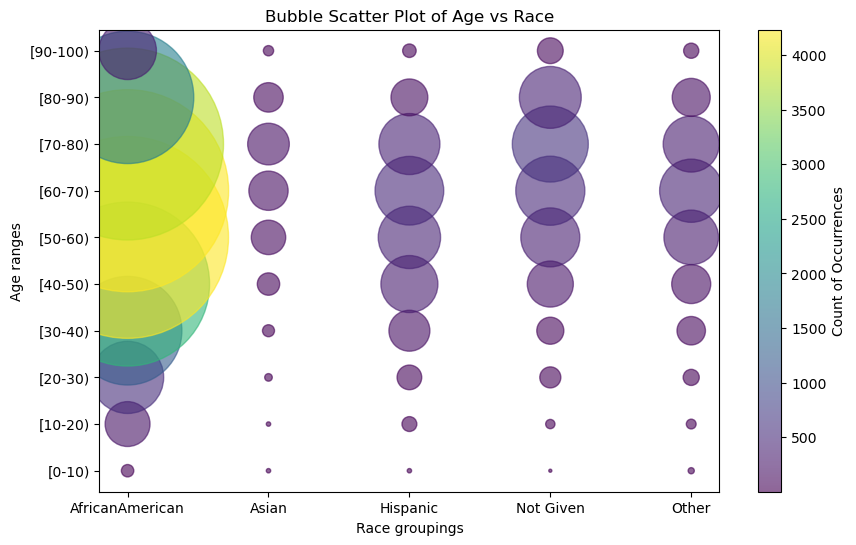

In [9]:
# quick visualization to see if there's anything notable about non-Caucasian patients by age and race

# Group by 'race' and 'age' and count occurrences
grouped_df = df_DBRaw[df_DBRaw['race'] != 'Caucasian'].groupby(['race', 'age']).size().reset_index(name='counts')
plt.figure(figsize=(10, 6))

# Create bubble scatter plot
scatter = plt.scatter(
    x=grouped_df['race'],
    y=grouped_df['age'],
    s=grouped_df['counts'] * 5,  # scale the bubble size
    c=grouped_df['counts'],        # color based on counts
    cmap='viridis',
    alpha=0.6
)

# Add color bar to show the count gradient
plt.colorbar(scatter, label='Count of Occurrences')

# Set axis labels and title
plt.ylabel('Age ranges')
plt.xlabel('Race groupings')
plt.title('Bubble Scatter Plot of Age vs Race')

# Show the plot
plt.show()

<Axes: xlabel='age', ylabel='num_medications'>

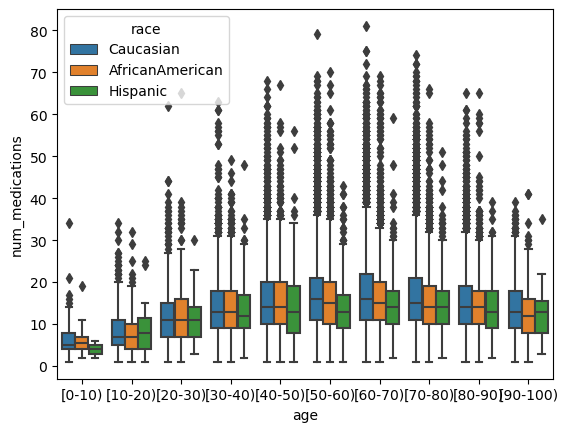

In [10]:
# trying another quick visualization to see a num_medications comparison between races across ages

sns.boxplot(x='age', y='num_medications', data=df_DBRaw[(df_DBRaw['race'] == 'AfricanAmerican') | (df_DBRaw['race'] == 'Caucasian') | (df_DBRaw['race'] == 'Hispanic')], hue='race')

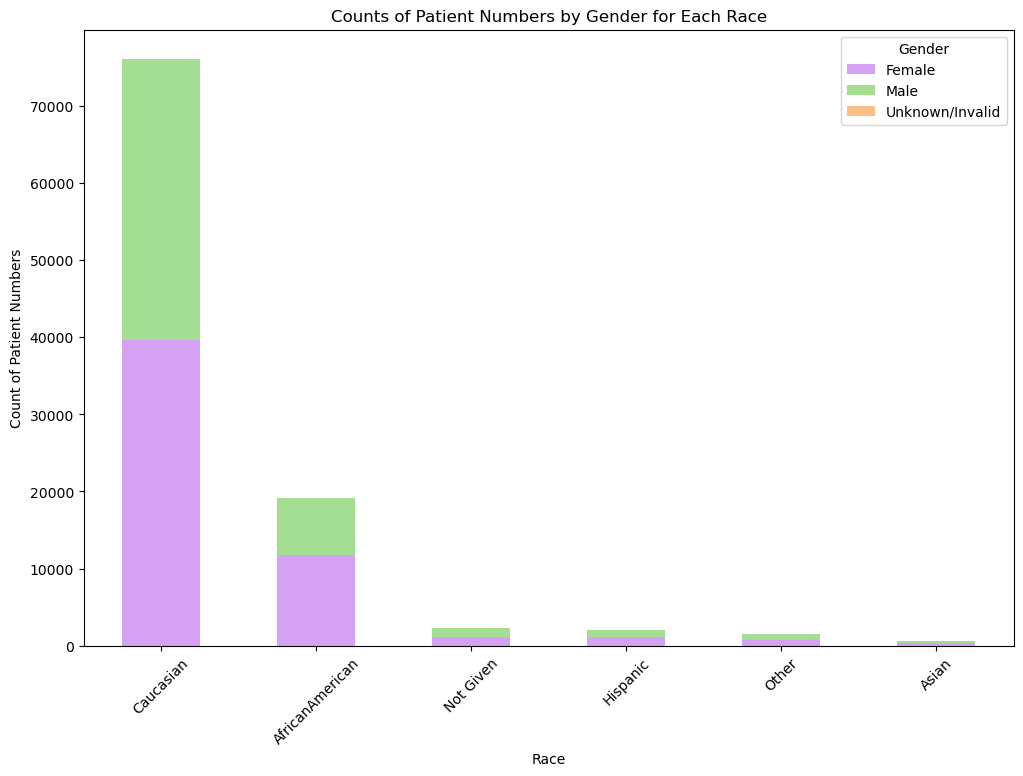

In [11]:
# another quick visualization to show the patient distribution between Male and Female genders across race

# create a pivot table to count patient numbers by race and gender
pivot_df = df_DBRaw.pivot_table(index='race', columns='gender', aggfunc='size', fill_value=0)

# order race by descending total counts
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('Total', ascending=False)
pivot_df.drop(columns='Total', inplace=True)

# make it a little pretty
colors = {'Female': '#D4A1F3', 'Male': '#A4DE92', 'Unknown/Invalid': '#FDBE86'}

# plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors.get(x, '#333333') for x in pivot_df.columns])

plt.title('Counts of Patient Numbers by Gender for Each Race')
plt.xlabel('Race')
plt.ylabel('Count of Patient Numbers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

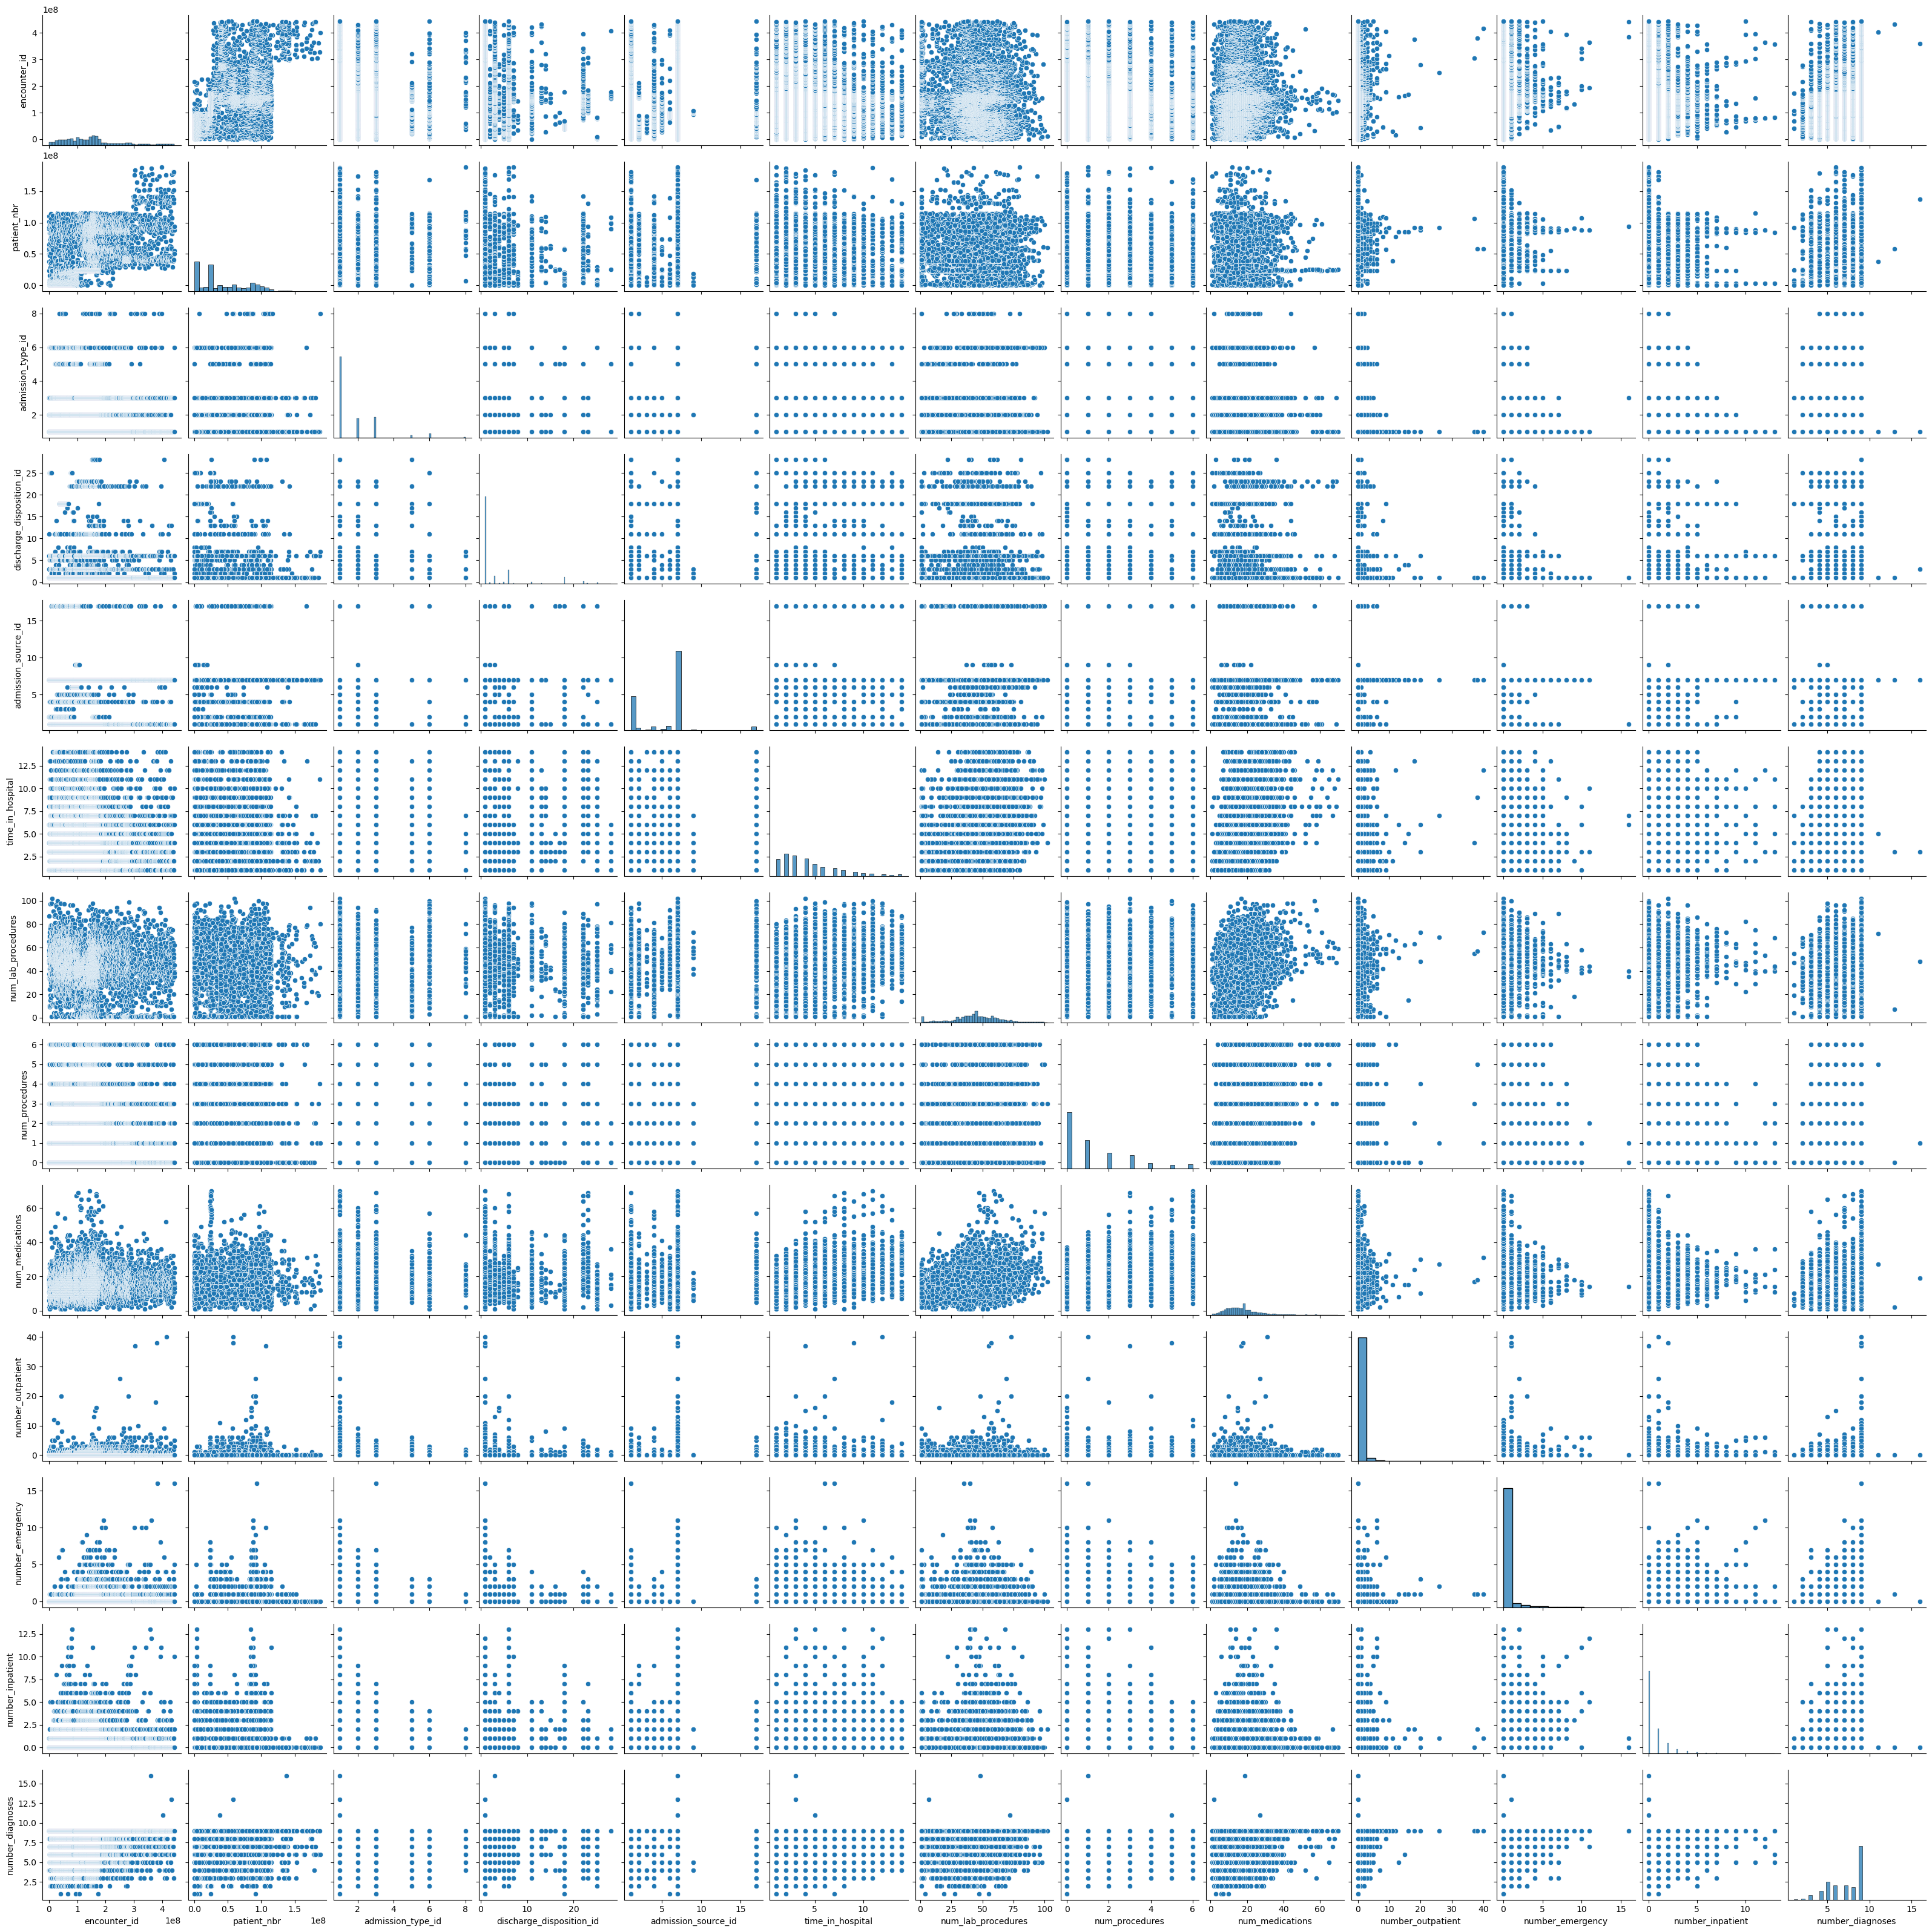

In [12]:
# these visualizations have drawn me to AfricanAmerican Females between the ages of 40 and 70
# so i'm going to subset my df_DBRaw to just non-Male participants in that age range 

df_females_40_70 = df_DBRaw[(df_DBRaw['gender'] != 'Male') & 
                            ((df_DBRaw['age'] == '[40-50)') | 
                             (df_DBRaw['age'] == '[50-60)') | 
                             (df_DBRaw['age'] == '[60-70)'))]

# and i'm going to create a separate dataframe for AfricanAmerican

df_AAfemales40_70 = df_females_40_70[df_females_40_70['race'] == 'AfricanAmerican']

# now i want to see if anything jumps out at me in the pairplots

sns.pairplot(df_AAfemales40_70)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

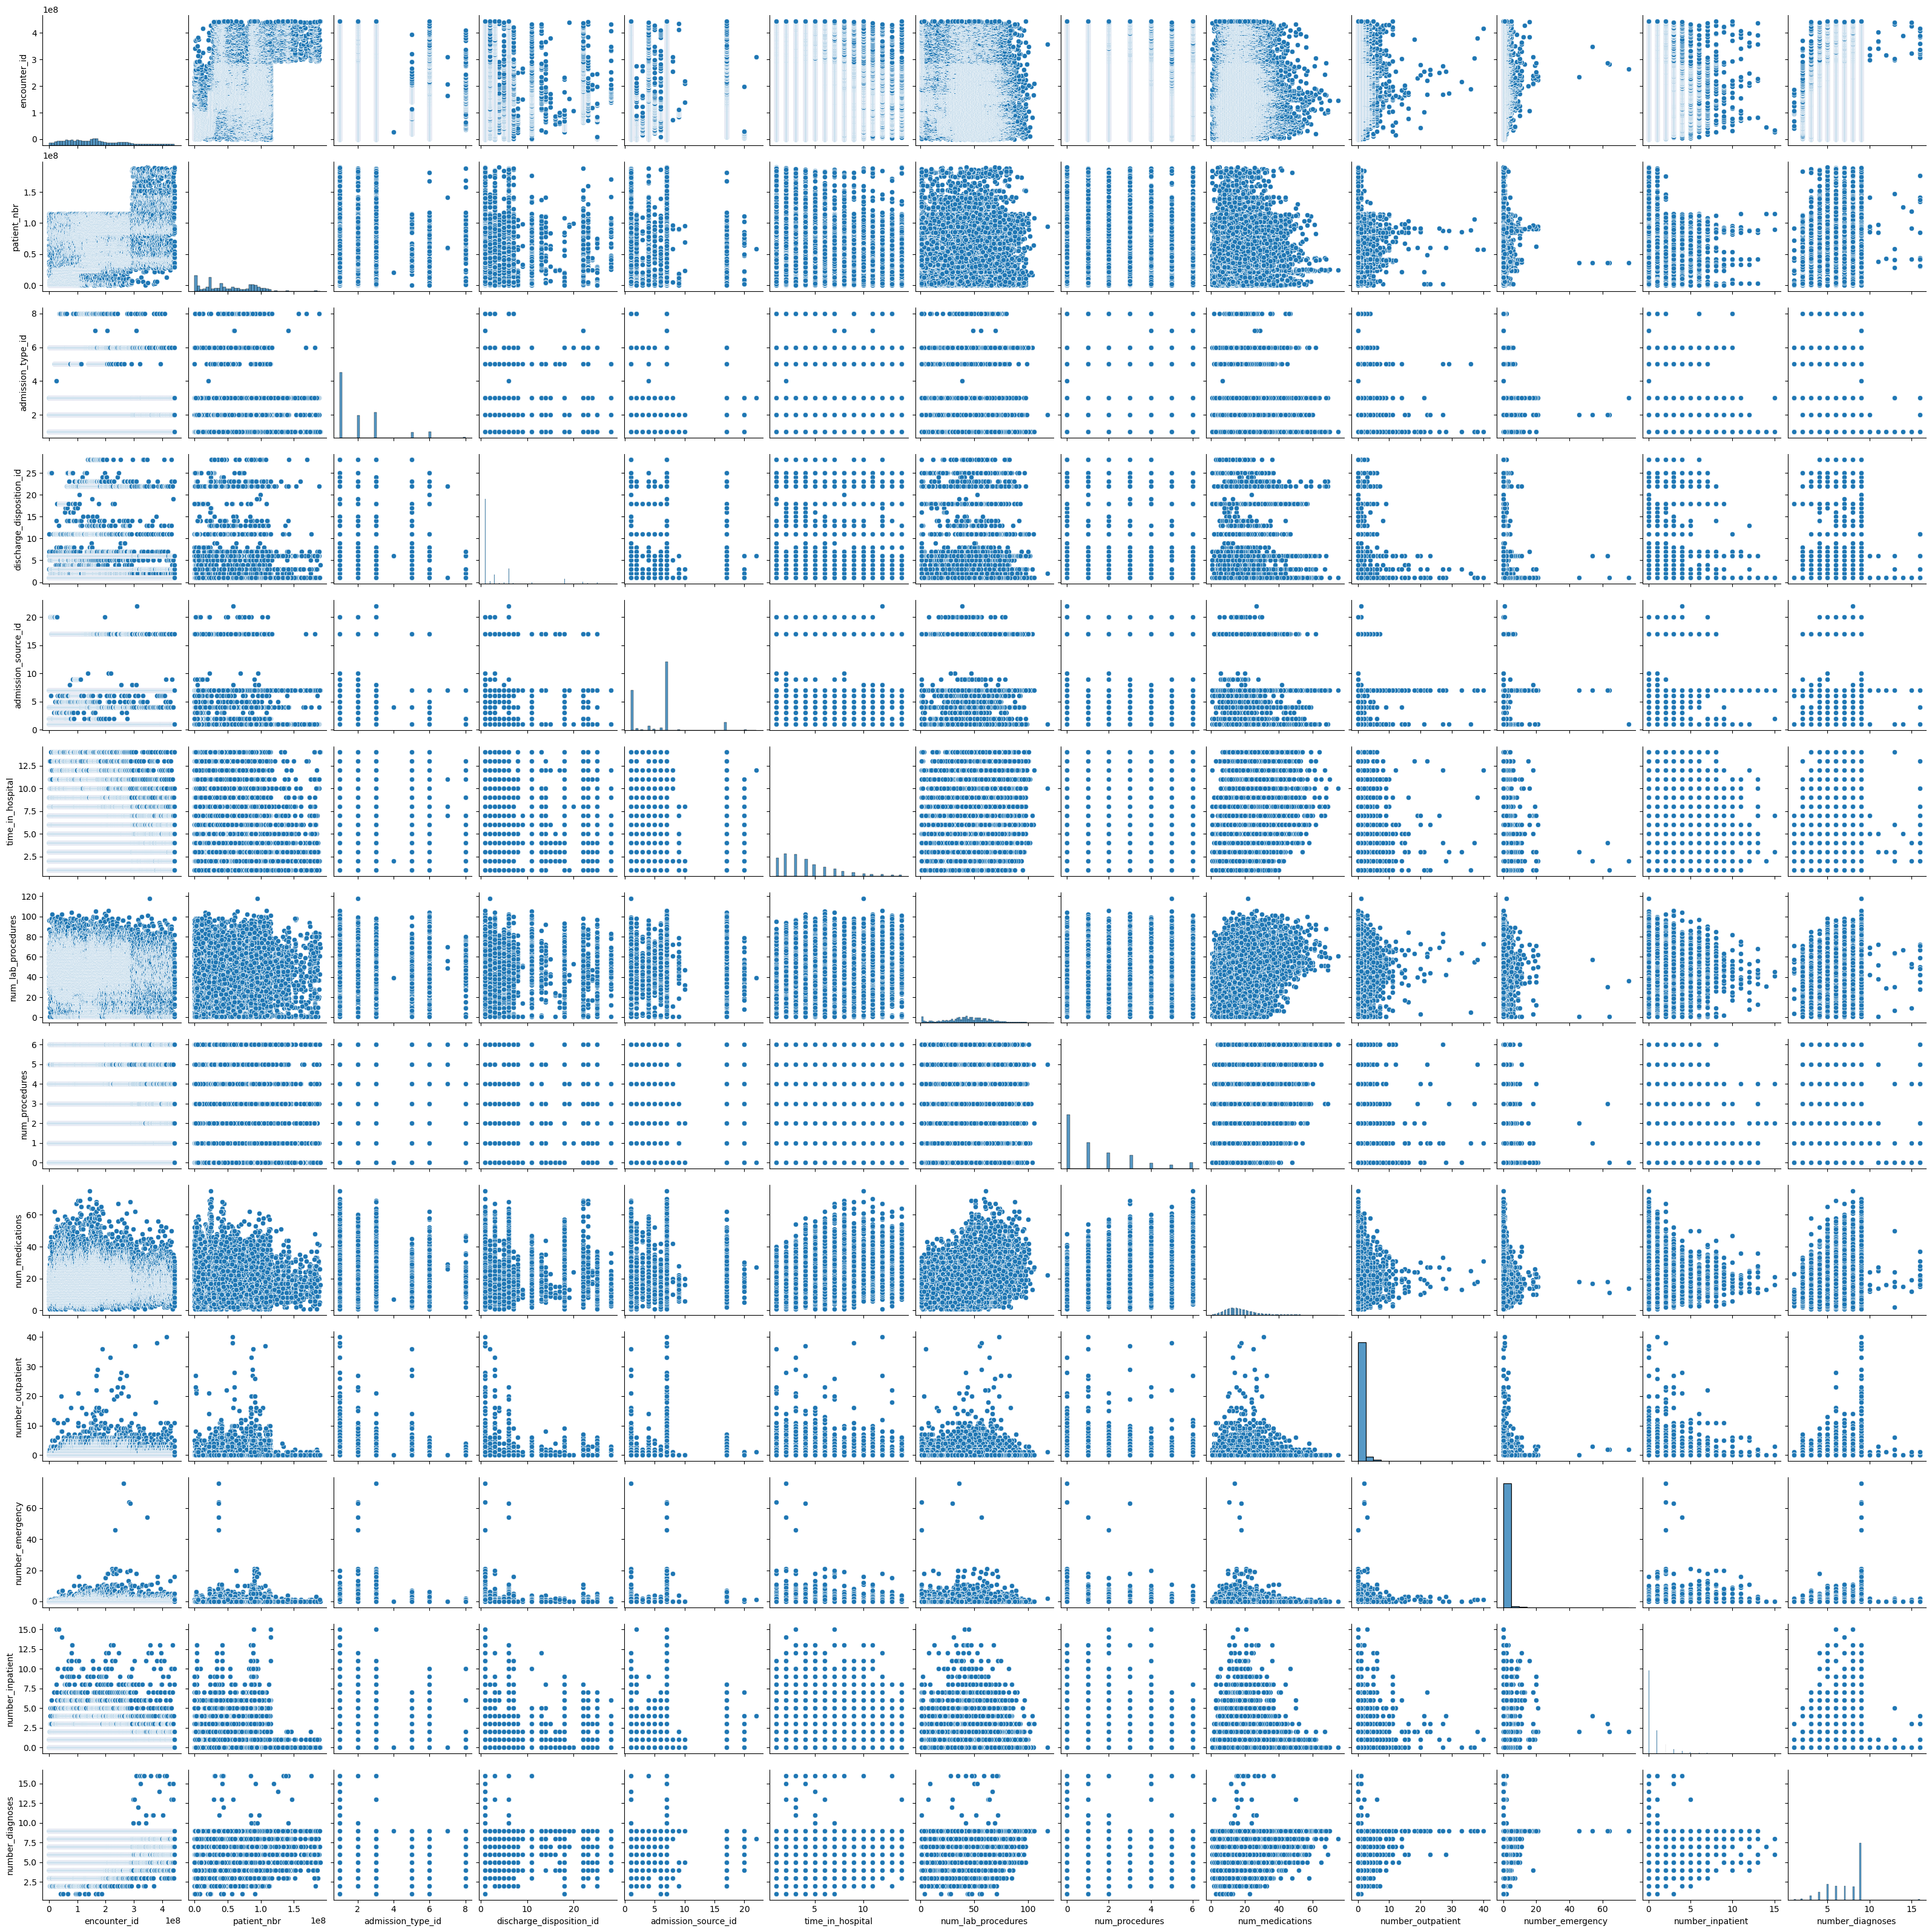

In [13]:
# now scan the pairplot for all Female

sns.pairplot(df_females_40_70)

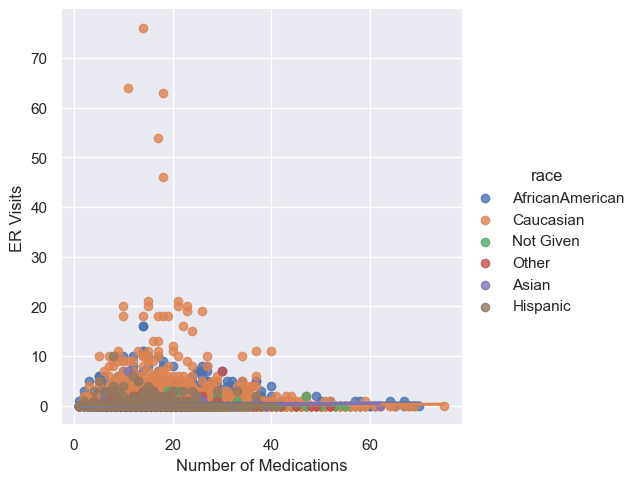

In [14]:
# looking at these two pairplots, i'm intrigued by number_emergency vs. num_medications, 
# so let's check a visualization there

sns.set_theme()

g1 = sns.lmplot(
    data=df_females_40_70,
    x="num_medications", y="number_emergency", hue="race",
    height=5
)

# Use more informative axis labels than are provided by default
g1.set_axis_labels("Number of Medications", "ER Visits")

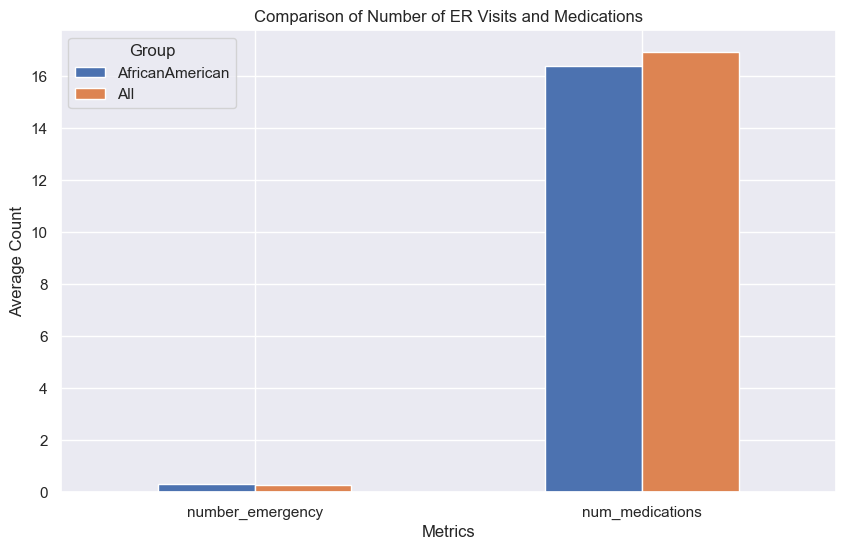

In [15]:
# yuck. that didn't give me anything super helpful. let's go with something a little more straightforward

# Calculate mean for number_emergency and num_medications
metrics_aa = df_AAfemales40_70[['number_emergency', 'num_medications']].mean()
metrics_all = df_females_40_70[['number_emergency', 'num_medications']].mean()

# Create a dataframe for plotting
comparison_df = pd.DataFrame({
    'AfricanAmerican': metrics_aa,
    'All': metrics_all
})

# Create a grouped bar plot
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Number of ER Visits and Medications')
plt.xlabel('Metrics')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.show()

In [ ]:
# it's hard to tell anything conclusive from this, but it looks like 
# average ER visits is slightly higher for the AfricanAmerican group of
# Female patients between 40 and 70, but that average medications is slightly lower
# for the same group.